# Часть первая: мы пробуем пандас

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [2]:
data = pd.read_csv('titanic_train.csv',
                  index_col='PassengerId')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [3]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
data.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,11967,91.0792,B49,C
437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.3750,NaN,S
47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q
815,0,3,"Tomlin, Mr. Ernest Portage",male,30.5,0,0,364499,8.0500,NaN,S
277,0,3,"Lindblom, Miss. Augusta Charlotta",female,45.0,0,0,347073,7.7500,NaN,S


In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
data.isnull().sum(axis=1).head()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
dtype: int64

**Ещё несколько интересных атрибутов и функций для анализа датафрейма**

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
data.memory_usage()

**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br>
Если нет – посмотрите, как вычисляется выражение в квадратных в скобках. <br>
Отдельно обратите внимание на то, какие при этом создаются структуры данных и сколько они живут

In [ ]:
# between for series 
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

**Можно отсортировать этих людей по убыванию платы за билет.**

In [ ]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

**Пример создания признака.**

In [13]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [14]:
data['Age_category'] = [age_category(age) for age in data['Age']]

**Другой способ – через `apply`.**

In [15]:
data['Age_category'] = data['Age'].apply(age_category)

**1. Сколько мужчин / женщин находилось на борту?**

In [16]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**

In [ ]:
data.groupby('Sex')['Pclass'].value_counts()

**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**

In [ ]:
# Ваш код здесь

**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**

In [17]:
data.groupby('Age_category')['Survived'].mean()

Age_category
1    0.406250
2    0.420139
3    0.296804
Name: Survived, dtype: float64

**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**

In [ ]:
# Ваш код здесь

**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**

In [21]:
data[data['Sex'] == 'male']['Name'].apply(lambda s: s.split('.')[1].split()[0]).value_counts()

William      35
John         25
George       14
Charles      13
Thomas       13
Henry        12
James        11
Richard      10
Edward        9
Johan         9
Karl          8
Frederick     8
Arthur        7
Alfred        7
Joseph        6
Samuel        6
Robert        6
Albert        5
Victor        5
Harry         5
Peter         5
Ernest        5
Walter        4
August        4
Ernst         4
Hans          4
Ivan          4
Daniel        4
Patrick       4
David         4
             ..
Thornton      1
Adolf         1
Pierre        1
Halim         1
Domingos      1
Josef         1
Cerin         1
Nicholas      1
Gustave       1
Emile         1
Elmer         1
Ahmed         1
Uscher        1
Malkolm       1
Mansouer      1
Hammad        1
Edgar         1
Jovo          1
Choong        1
Einar         1
Dibo          1
Pekka         1
Jose          1
Viktor        1
Andre         1
Peju          1
Howard        1
Tido          1
Yousseff      1
Ignjac        1
Name: Name, Length: 287,

**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**

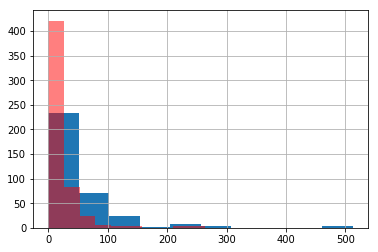

In [26]:
data[data['Survived'] == 1]['Fare'].hist()
data[data['Survived'] == 0]['Fare'].hist(color='Red', alpha= .5)

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

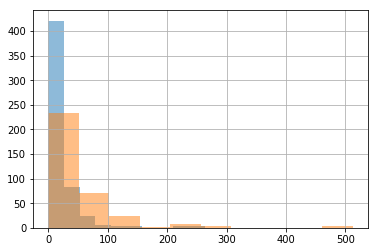

In [27]:
data.groupby('Survived')['Fare'].hist(alpha=.5)

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [28]:
data.groupby(['Pclass', 'Sex'])['Age'].mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

 # Конец первой части

# Часть вторая: пандас пробует нас

## Apply and his friends

**Для более подробного анализа apply сделаем небольшой датафрейм:**

In [29]:
numbers = pd.DataFrame({'x': [1, 2, 3, 4, 5], 'y': [6, 7, 8, 9, 0]})
numbers

,x,y
0,1,6
1,2,7
2,3,8
3,4,9
4,5,0


**Давайте напишем простую функцию, которая печатает результат apply:**

In [30]:
def apply_and_inspect(data, func='apply', callme=None, axis=None, log=False):    
    kwargs = {'log': log}
    if axis is not None:
        kwargs['axis'] = axis
        
    ret = getattr(data, func)(callme, **kwargs)
    print('=======')
    print(f'Result:\n{ret}\nType: {type(ret)}')
    

In [31]:
def square(x, log=False):
    if log:
        print(f'-------\n'
              f'{x}\n'
              f'Type: {type(x)}')
    return x ** 2

In [32]:
apply_and_inspect(numbers, callme=square, log=True)

-------
0    1
1    2
2    3
3    4
4    5
Name: x, dtype: int64
Type: <class 'pandas.core.series.Series'>
-------
0    1
1    2
2    3
3    4
4    5
Name: x, dtype: int64
Type: <class 'pandas.core.series.Series'>
-------
0    6
1    7
2    8
3    9
4    0
Name: y, dtype: int64
Type: <class 'pandas.core.series.Series'>
Result:
    x   y
0   1  36
1   4  49
2   9  64
3  16  81
4  25   0
Type: <class 'pandas.core.frame.DataFrame'>


In [ ]:
apply_and_inspect(numbers, callme=square, axis=1)

In [ ]:
apply_and_inspect(numbers[['x']], callme=square)

In [ ]:
apply_and_inspect(numbers['x'], callme=square)

**Теперь посмотрим на более специфичные методы applymap и map:**

In [33]:
apply_and_inspect(numbers, func='applymap', callme=square)

TypeError: applymap() got an unexpected keyword argument 'log'

In [ ]:
apply_and_inspect(numbers['x'], func='map', callme=square)

In [ ]:
def squared_series(x):
    return pd.Series({'value': x, 'square': x ** 2})

In [ ]:
apply_and_inspect(numbers['x'], func='apply', callme=squared_series)

In [ ]:
apply_and_inspect(numbers['x'], func='map', callme=squared_series)

### А всегда ли нужен apply?

In [ ]:
numbers['x'].pow(2)

**Pandas поддерживает так называемые ufuncs из numpy. Эти функции имеют низкоуровневую реализацию, поэтому будут работать быстрее**

**Продолжим веселье с Титаником**

In [ ]:
data['Name'].head()

**Достанем фамилии уже знакомым нам методом:**

In [ ]:
data['Name'].apply(lambda x: x.split(',', 1)[0]).head()

**А теперь чуть-чуть волшебства с помощью волшебного str data accessor:**

In [ ]:
data['Name'].str.split(',', 1).str.get(0).head()

**И совсем неприлично:**

In [ ]:
import re

data['Name'].str.findall(re.compile('^(.+),')).str.get(0).head()

**Это, конечно, далеко не все возможности str. Более того, есть ещё dt для работы с датами/временем. <br> 
Подробнее — здесь: <br> 
https://pandas.pydata.org/pandas-docs/stable/text.html <br> 
https://pandas.pydata.org/pandas-docs/stable/timeseries.html**

## GroupBy

**Вспомним, как посчитать количество пассажиров каждого пола:**

In [ ]:
data['Sex'].value_counts()

**Попытаемся сделать то же самое, но с разбиением на классы:**

In [ ]:
# Code here

**Выглядит не очень круто. А теперь сделаем правильно**

In [ ]:
data.groupby('Pclass')['Sex'].value_counts()

**А можно и наоборот**

In [ ]:
data.groupby('Sex')['Pclass'].value_counts()

**И даже по нескольким колонкам сразу:**

In [ ]:
data.groupby(['Pclass', 'Sex'])['Age'].median()

**Продолжим мучить apply**

In [ ]:
numbers['z'] = [1, 0, 1, 0, 1]
numbers

In [ ]:
apply_and_inspect(numbers.groupby('z'), callme=square, log=True)

**Вообще GroupBy — один из мощнейших инструментов в Pandas, но описание всех его возможностей выходит за рамки нашего курса. Любознательные читатели приглашаются в документацию: https://pandas.pydata.org/pandas-docs/stable/groupby.html**

## Merge

**Теперь давайте добавим внешнюю информацию о городах:**

In [ ]:
cities = pd.DataFrame({'Embarked': ['S', 'C', 'Q'],
                       'City': ['Southampton', 'Cherbourg', 'Queenstown'],
                       'Latitude': [50.8908, 49.6326, 51.840],
                       'Longitude': [-1.3493, -1.5611, -8.2418]})
cities

**Было бы неплохо теперь добавить её в наш датасет (зачем-нибудь)**

In [ ]:
data.merge(cities, on='Embarked', how='left').head()

In [ ]:
rows = pd.DataFrame({'x': [4, 4, 4], 'y': [8, 8, 8]})
pd.concat([numbers, rows], ignore_index=True)

**Семантика merge очень похожа на JOIN в SQL. Для более подробного изучения советую прочитать вот эту статью: https://pandas.pydata.org/pandas-docs/stable/merging.html**

## Запросы

**Вернёмся к селектору из самого начала**

In [ ]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

**Попробуем переписать это с использованием query:**

In [ ]:
data.query('Embarked == "C" and Fare > 200').head()

**И — в качестве упражнения — давайте посчитаем двумя способами всех мужчин старше 33 лет из 2-3 классов:**

In [ ]:
data[(data['Age'] > 33) & (data['Sex'] == 'male') & (data['Pclass'] != 1)].head()

In [ ]:
data.query('Age > 33 and Sex == "male" and Pclass != 1').head()

**Усложним себе жизнь и будем сравнивать возраст не со сферическим 33 в вакууме, а с настоящей медианой:**

In [ ]:
median_age = data['Age'].median()
data[(data['Age'] > median_age) & (data['Sex'] == 'male') & (data['Pclass'] != 1)].head()

**То же самое из query:**

In [ ]:
data.query('Age > @median_age and Sex == "male" and Pclass != 1').head()

**query и его старший брат eval позволяют сэкономить память на создании промежуточных массивов и сделать выражения читабельнее
Разницы в производительности на достаточно больших массивах не замечается. **

*Подробнее можно почитать тут: https://jakevdp.github.io/PythonDataScienceHandbook/03.12-performance-eval-and-query.html *

query лушче на больших объемах данных по памяти


## Пайплайны

**Как вы могли заметить, операции над датафреймами очень удобно выстраивать в цепочки:**

In [ ]:
(data.query('Age > 33 and Pclass != 1')
     .groupby(['Pclass', 'Sex'], as_index=False)
     .agg({'Age': 'median',
           'Name': 'first',
           'Embarked': lambda x: 'Chelyabinsk (WTF?)'})
     .reset_index(drop=True)
     .assign(Generated=True)
     .rename(columns={'Sex': 'Gender'}))

**Получается наглядно, читаемо и ~~функционально~~ без промежуточных переменных<br>
Но есть нюанс (гусары, молчать!). Иногда нам нужно пропустить датафрейм через несколько функций**

In [ ]:
def add_noise(df, *, randomizer):
    return df + randomizer(size=df.shape)

def multiply_by_number(df, value):
    return df * value

def duplicate(df):
    return pd.concat([df, df], ignore_index=True)

**Получается плохо читаемая лапша**

In [ ]:
add_noise(duplicate(multiply_by_number(numbers, 42)), randomizer=np.random.normal)

**Или так:**

In [ ]:
multiplied = multiply_by_number(numbers, 42)
duplicated = duplicate(multiplied)
noised = add_noise(duplicated, randomizer=np.random.normal)
noised

**pandas-way:**

In [ ]:
(numbers.pipe(multiply_by_number, 42)
        .pipe(duplicate)
        .pipe(add_noise, randomizer=np.random.normal))

## Ещё немного о pandas-way: чем меньше циклов, тем лучше

In [ ]:
numbers = pd.DataFrame(np.random.rand(100000, 2))
numbers.head()

In [34]:
%%timeit
for i in range(numbers.shape[0]):
    numbers.iloc[i, 0] = numbers.iloc[i, 0] ** 2 + numbers.iloc[i, 1]

1.41 ms ± 41.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [36]:
%%timeit
for _, row in numbers.iterrows():
    row[0] = row[0] ** 2 + row[1]

454 µs ± 13.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [41]:
%%timeit
numbers.apply(lambda row: row[0] ** 2 + row[1] + np.random.randint(100))

305 µs ± 27.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [35]:
%%timeit
numbers.iloc[:, 0] = numbers.iloc[:, 0].pow(2) + numbers.iloc[:, 1]

590 µs ± 25.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
